In [44]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]
WEIGHTS = torch.tensor([0.00287505, 0.00246512, 0.01015641, 0.00615233, 0.00702346, 0.02318034])

In [46]:
# Load all data
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = ["text"]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [47]:
X_train_maxtoks = X_train['text'].str.len().max()
X_test_maxtoks = X_test['text'].str.len().max()
X_val_maxtoks = X_val['text'].str.len().max() 

max_toks = max(X_train_maxtoks, X_test_maxtoks, X_val_maxtoks)
print(max_toks)

300


# Data Loaders

In [48]:
# Pytorch specific constants
from torch.utils.data import TensorDataset, DataLoader
from extractors.chartok import  CharTokenDataset
from utils.neuralnet import NeuralNetwork
from utils.rnn import LSTMNetwork
from utils.transformer import TransformerEncoder
from utils.trainer import training_loop, evaluate
import torch

BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1000

# Standard 1 Layer Perceptron

In [49]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [50]:
mlp = NeuralNetwork(max_toks, [], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/slpseq")

Epoch 1
train_loss = 13.3165, val_loss = 10.5315
Epoch 2
train_loss = 6.8056, val_loss = 9.1343
Epoch 3
train_loss = 9.6629, val_loss = 8.0055
Epoch 4
train_loss = 6.5904, val_loss = 7.0373
Epoch 5
train_loss = 5.9433, val_loss = 5.9099
Epoch 6
train_loss = 6.0792, val_loss = 5.1443
Epoch 7
train_loss = 3.9346, val_loss = 4.3694
Epoch 8
train_loss = 4.2452, val_loss = 3.8582
Epoch 9
train_loss = 3.6123, val_loss = 3.6018
Epoch 10
train_loss = 2.9172, val_loss = 3.1356
Epoch 11
train_loss = 2.8476, val_loss = 2.8443
Epoch 12
train_loss = 2.8255, val_loss = 2.6507
Epoch 13
train_loss = 3.9373, val_loss = 2.4802
Epoch 14
train_loss = 2.8513, val_loss = 2.5503
Epoch 15
train_loss = 1.8692, val_loss = 2.3537
Epoch 16
train_loss = 1.9435, val_loss = 2.1672
Epoch 17
train_loss = 2.0682, val_loss = 2.1716
Epoch 18
train_loss = 1.7116, val_loss = 2.1043
Epoch 19
train_loss = 1.8783, val_loss = 2.1244
Epoch 20
train_loss = 1.4752, val_loss = 2.0559
Epoch 21
train_loss = 1.5017, val_loss = 2.0102

loss = 1.5727
accuracy = 0.3360
f1 = 0.2642
[[0.31420765 0.27804878 0.5        0.1        0.3        0.        ]
 [0.32923497 0.35528455 0.375      0.45       0.5        0.        ]
 [0.07103825 0.08617886 0.         0.05       0.         0.        ]
 [0.13797814 0.13821138 0.         0.2        0.         0.        ]
 [0.12431694 0.10487805 0.         0.15       0.1        0.        ]
 [0.02322404 0.03739837 0.125      0.05       0.1        0.        ]]


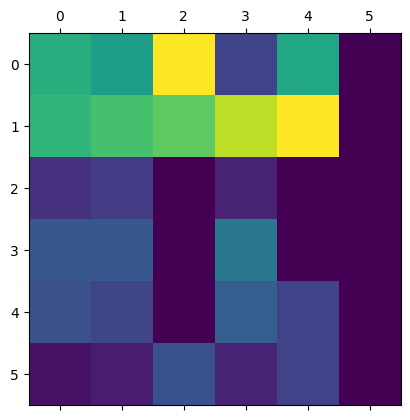

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Standard MLP

In [ ]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [ ]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/mlpseq")

Epoch 1
train_loss = 1.6436, val_loss = 1.5911
Epoch 2
train_loss = 1.6620, val_loss = 1.5874
Epoch 3
train_loss = 1.5320, val_loss = 1.5837
Epoch 4
train_loss = 1.5878, val_loss = 1.5830
Epoch 5
train_loss = 1.6648, val_loss = 1.5817
Epoch 6
train_loss = 1.5469, val_loss = 1.5826
Epoch 7
train_loss = 1.6464, val_loss = 1.5851
Epoch 8
train_loss = 1.5953, val_loss = 1.5827
Epoch 9
train_loss = 1.5365, val_loss = 1.5824
Epoch 10
train_loss = 1.4230, val_loss = 1.5815
Epoch 11
train_loss = 1.7528, val_loss = 1.5817
Epoch 12
train_loss = 1.4775, val_loss = 1.5821
Epoch 13
train_loss = 1.6512, val_loss = 1.5795
Epoch 14
train_loss = 1.4384, val_loss = 1.5818
Epoch 15
train_loss = 1.3520, val_loss = 1.5801
Epoch 16
train_loss = 1.5861, val_loss = 1.5812
Epoch 17
train_loss = 1.7807, val_loss = 1.5780
Epoch 18
train_loss = 1.5014, val_loss = 1.5826
Epoch 19
train_loss = 1.6369, val_loss = 1.5818
Epoch 20
train_loss = 1.5468, val_loss = 1.5800
Epoch 21
train_loss = 1.7030, val_loss = 1.5801
E

KeyboardInterrupt: 

loss = 2.7119
accuracy = 0.2985
f1 = 0.2465
[[0.29435484 0.29528986 0.18518519 0.29411765 0.22222222 0.        ]
 [0.34811828 0.33333333 0.51851852 0.39215686 0.44444444 1.        ]
 [0.07258065 0.08242754 0.07407407 0.07843137 0.11111111 0.        ]
 [0.13306452 0.14130435 0.07407407 0.11764706 0.16666667 0.        ]
 [0.11827957 0.11231884 0.14814815 0.11764706 0.02777778 0.        ]
 [0.03360215 0.03532609 0.         0.         0.02777778 0.        ]]


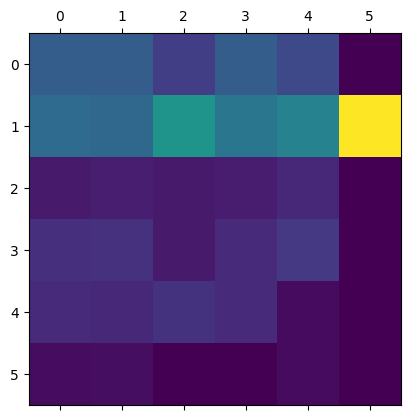

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# MLP with Weighting

In [ ]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=100, learning_rate=LEARNING_RATE, path="models/mlpseqwt", weights=WEIGHTS)

Epoch 1
train_loss = 1.8020, val_loss = 1.7922
Epoch 2
train_loss = 1.7931, val_loss = 1.7923
Epoch 3
train_loss = 1.8038, val_loss = 1.7932
Epoch 4
train_loss = 1.7784, val_loss = 1.7927
Epoch 5
train_loss = 1.7800, val_loss = 1.7914
Epoch 6
train_loss = 1.7956, val_loss = 1.7917
Epoch 7
train_loss = 1.7737, val_loss = 1.7916
Epoch 8
train_loss = 1.8168, val_loss = 1.7922
Epoch 9
train_loss = 1.7695, val_loss = 1.7929
Epoch 10
train_loss = 1.8143, val_loss = 1.7930
Epoch 11
train_loss = 1.7979, val_loss = 1.7919
Epoch 12
train_loss = 1.7739, val_loss = 1.7914
Epoch 13
train_loss = 1.7928, val_loss = 1.7933
Epoch 14
train_loss = 1.7679, val_loss = 1.7914
Epoch 15
train_loss = 1.7867, val_loss = 1.7920
Epoch 16
train_loss = 1.7697, val_loss = 1.7921
Epoch 17
train_loss = 1.7823, val_loss = 1.7897
Epoch 18
train_loss = 1.7802, val_loss = 1.7921
Epoch 19
train_loss = 1.8291, val_loss = 1.7919
Epoch 20
train_loss = 1.8120, val_loss = 1.7929
Epoch 21
train_loss = 1.8143, val_loss = 1.7929
E

loss = 1.7622
accuracy = 0.2380
f1 = 0.2451
[[0.30065359 0.30560579 0.26470588 0.22164948 0.30603448 0.29824561]
 [0.3496732  0.35081374 0.3697479  0.36597938 0.31896552 0.31578947]
 [0.06699346 0.06690778 0.1302521  0.10824742 0.05172414 0.0994152 ]
 [0.13235294 0.12658228 0.12605042 0.15979381 0.14655172 0.16959064]
 [0.11764706 0.11754069 0.06722689 0.1185567  0.13793103 0.09356725]
 [0.03267974 0.03254973 0.04201681 0.0257732  0.0387931  0.02339181]]


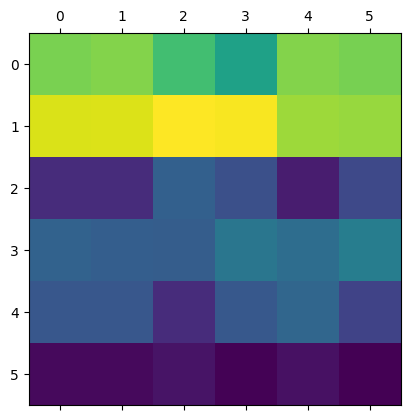

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# RNN

In [35]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [13]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)
training_loop(lstm, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/lstmseq")
torch.save(lstm.state_dict(), "models/lstmseq")

Epoch 1
train_loss = 1.5658, val_loss = 1.5817
Epoch 2
train_loss = 1.5927, val_loss = 1.5836
Epoch 3
train_loss = 1.6476, val_loss = 1.5819
Epoch 4
train_loss = 1.6740, val_loss = 1.5811
Epoch 5
train_loss = 1.6211, val_loss = 1.5814
Epoch 6
train_loss = 1.5743, val_loss = 1.5854
Epoch 7
train_loss = 1.4476, val_loss = 1.5847
Epoch 8
train_loss = 1.6387, val_loss = 1.5795
Epoch 9
train_loss = 1.6044, val_loss = 1.5838
Epoch 10
train_loss = 1.7186, val_loss = 1.5828
Epoch 11
train_loss = 1.4446, val_loss = 1.5801
Epoch 12
train_loss = 1.6853, val_loss = 1.5802
Epoch 13
train_loss = 1.7715, val_loss = 1.5817
Epoch 14
train_loss = 1.5171, val_loss = 1.5790
Epoch 15
train_loss = 1.6671, val_loss = 1.5806
Epoch 16
train_loss = 1.5925, val_loss = 1.5822
Epoch 17
train_loss = 1.6819, val_loss = 1.5826
Epoch 18
train_loss = 1.3657, val_loss = 1.5797
Epoch 19
train_loss = 1.6934, val_loss = 1.5814
Epoch 20
train_loss = 1.5442, val_loss = 1.5807
Epoch 21
train_loss = 1.5850, val_loss = 1.5807
E

KeyboardInterrupt: 

In [37]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)

In [36]:
for x in train_loader:
    print(x)

[tensor([[105,  32, 104,  ...,  10,  10,  10],
        [105, 109,  32,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        ...,
        [105,  32, 100,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10]], dtype=torch.int32), tensor([1, 1, 3, 0, 0, 5, 3, 3, 4, 0, 4, 1, 1, 1, 1, 1, 3, 3, 4, 1, 1, 1, 1, 1,
        1, 0, 3, 0, 1, 1, 0, 2])]
[tensor([[105,  32, 119,  ...,  10,  10,  10],
        [105,  32, 103,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        ...,
        [105,  32, 107,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        [105,  32, 104,  ...,  10,  10,  10]], dtype=torch.int32), tensor([0, 1, 1, 0, 0, 0, 4, 0, 0, 4, 1, 1, 1, 1, 1, 1, 0, 0, 3, 4, 0, 0, 3, 1,
        1, 1, 3, 4, 1, 1, 0, 0])]
[tensor([[105, 109,  32,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        [105,  32, 102,  ...,  10,  10,  10],
        ...

loss = 1.8052
accuracy = 0.2340
f1 = 0.2354
[[0.30072993 0.27513228 0.2565445  0.28854626 0.31380753 0.30188679]
 [0.3620438  0.36243386 0.40837696 0.31497797 0.30962343 0.28301887]
 [0.08467153 0.07142857 0.07329843 0.08370044 0.06694561 0.11320755]
 [0.11824818 0.12962963 0.14659686 0.16519824 0.12552301 0.22641509]
 [0.09927007 0.11640212 0.08900524 0.12555066 0.14644351 0.05660377]
 [0.0350365  0.04497354 0.02617801 0.02202643 0.0376569  0.01886792]]


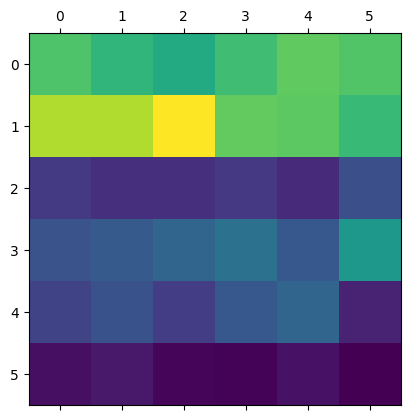

In [39]:
_, _, _, cmat = evaluate(model=lstm, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Transformer

In [99]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(val_data, batch_size=1, shuffle=True)


In [102]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=10, dropout=0.1)
training_loop(transformer, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, weights = WEIGHTS)
torch.save(transformer.state_dict(), "models/xformerseq")

NameError: name 'WEIGHTS' is not defined

In [83]:
evaluate(model=transformer, val_dl=test_loader)

loss = 1.5704
accuracy = 0.3498
f1 = 0.1813


(tensor(1.5704), 0.34975, 0.18125588071865162)